In [41]:
import torch
from torch import nn

In [42]:
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

In [43]:
x_data, y_data

(tensor([[1.],
         [2.],
         [3.]]),
 tensor([[2.],
         [4.],
         [6.]]))

In [44]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        y_hat = self.linear(x)
        return y_hat
model = LinearModel()

In [45]:
model

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [46]:
loss = nn.MSELoss(size_average = False)
loss

D:\anconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


MSELoss()

In [47]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [48]:
loss_list = []
epoch_list = []
for epoch in range(100):
    y_pred = model(x_data) # 预测值
    l = loss(y_pred, y_data) # 误差
    loss_list.append(l)
    epoch_list.append(epoch)
    print(epoch, l.item())
    optimizer.zero_grad() # 梯度清零
    l.backward() # 反向传播
    #optimizer.zero_grad() # 梯度清零
    optimizer.step() # 更新参数

print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())

0 70.6767807006836
1 31.549625396728516
2 14.130082130432129
3 6.374176979064941
4 2.9202606678009033
5 1.3814893960952759
6 0.6952994465827942
7 0.38867345452308655
8 0.25103455781936646
9 0.18864139914512634
10 0.1597602665424347
11 0.14581401646137238
12 0.13853229582309723
13 0.13423269987106323
14 0.1312757432460785
15 0.12893134355545044
16 0.1268749237060547
17 0.12496078759431839
18 0.12312458455562592
19 0.12133701890707016
20 0.11958521604537964
21 0.11786313354969025
22 0.11616745591163635
23 0.11449728906154633
24 0.11285137385129929
25 0.11122960597276688
26 0.10963080823421478
27 0.10805544257164001
28 0.10650241374969482
29 0.10497184097766876
30 0.10346309095621109
31 0.10197614878416061
32 0.1005106046795845
33 0.09906625002622604
34 0.0976424440741539
35 0.09623917937278748
36 0.09485598653554916
37 0.09349267184734344
38 0.09214910864830017
39 0.0908249020576477
40 0.08951954543590546
41 0.08823290467262268
42 0.0869649350643158
43 0.08571518212556839
44 0.0844833180

In [49]:
x_test = torch.tensor([4.0])
y_test = model(x_test)
print('y_pred = ', y_test)

y_pred =  tensor([7.7756], grad_fn=<AddBackward0>)


In [50]:
import matplotlib.pyplot as plt

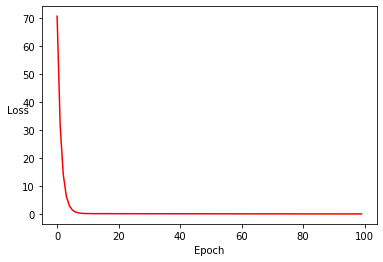

In [54]:
plt.plot(epoch_list, loss_list, c = 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss', rotation = 0)
plt.show()